To Do: 

* EfficientNetB0

* MobileNetV2

* EfficientNetV2B3

* Resnet50

* DenseNet121

* InceptionV3

# **1-Checking GPU**

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-53a3e216-6706-e120-b818-40b8c0b04c26)


# **2- Import Libraries**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tf.__version__

'2.15.0'

# **3- Import Functions from helping function**

In [59]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

# **4- import dataset**

In [5]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import splitfolders

# splitfolders.ratio("../../data/", output="../../output_1",
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [7]:
#How many images/classes are there?
walk_through_dir("../../output_1")

There are 3 directories and 0 images in '../../output_1'.
There are 37 directories and 0 images in '../../output_1\test'.
There are 0 directories and 63 images in '../../output_1\test\Apple__black_rot'.
There are 0 directories and 166 images in '../../output_1\test\Apple__healthy'.
There are 0 directories and 37 images in '../../output_1\test\Apple__rust'.
There are 0 directories and 70 images in '../../output_1\test\Apple__scab'.
There are 0 directories and 50 images in '../../output_1\test\Cassava__bacterial_blight'.
There are 0 directories and 57 images in '../../output_1\test\Cassava__brown_streak_disease'.
There are 0 directories and 48 images in '../../output_1\test\Cassava__green_mottle'.
There are 0 directories and 69 images in '../../output_1\test\Cassava__healthy'.
There are 0 directories and 45 images in '../../output_1\test\Cassava__mosaic_disease'.
There are 0 directories and 132 images in '../../output_1\test\Corn__common_rust'.
There are 0 directories and 110 images in '

In [8]:
train_dir_1 = "../../output_1/train/"
val_dir_1 = "../../output_1/val/"
test_dir_1 = "../../output_1/test"

In [9]:
#How many images/classes are there?
walk_through_dir("../../output_1")

There are 3 directories and 0 images in '../../output_1'.
There are 37 directories and 0 images in '../../output_1\test'.
There are 0 directories and 63 images in '../../output_1\test\Apple__black_rot'.
There are 0 directories and 166 images in '../../output_1\test\Apple__healthy'.
There are 0 directories and 37 images in '../../output_1\test\Apple__rust'.
There are 0 directories and 70 images in '../../output_1\test\Apple__scab'.
There are 0 directories and 50 images in '../../output_1\test\Cassava__bacterial_blight'.
There are 0 directories and 57 images in '../../output_1\test\Cassava__brown_streak_disease'.
There are 0 directories and 48 images in '../../output_1\test\Cassava__green_mottle'.
There are 0 directories and 69 images in '../../output_1\test\Cassava__healthy'.
There are 0 directories and 45 images in '../../output_1\test\Cassava__mosaic_disease'.
There are 0 directories and 132 images in '../../output_1\test\Corn__common_rust'.
There are 0 directories and 110 images in '

There are 0 directories and 1278 images in '../../output_1\train\Tomato__healthy'.
There are 0 directories and 1535 images in '../../output_1\train\Tomato__late_blight'.
There are 0 directories and 765 images in '../../output_1\train\Tomato__leaf_mold'.
There are 0 directories and 305 images in '../../output_1\train\Tomato__mosaic_virus'.
There are 0 directories and 1425 images in '../../output_1\train\Tomato__septoria_leaf_spot'.
There are 0 directories and 1340 images in '../../output_1\train\Tomato__spider_mites_(two_spotted_spider_mite)'.
There are 0 directories and 1123 images in '../../output_1\train\Tomato__target_spot'.
There are 0 directories and 2571 images in '../../output_1\train\Tomato__yellow_leaf_curl_virus'.
There are 37 directories and 0 images in '../../output_1\val'.
There are 0 directories and 62 images in '../../output_1\val\Apple__black_rot'.
There are 0 directories and 164 images in '../../output_1\val\Apple__healthy'.
There are 0 directories and 35 images in '..

# **5- Setup data inputs**

In [10]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1,
                                                                label_mode="categorical",
                                                                 batch_size=32,
                                                                image_size=IMG_SIZE,
                                                                 seed=42,
                                                                 shuffle=True)
val_data =  tf.keras.preprocessing.image_dataset_from_directory(val_dir_1,
                                                                 batch_size=32,                                                                
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                seed=42,
                                                                 shuffle=False) # don't shuffle test data for prediction analysis

test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir_1,
                                                                 batch_size=32,                                                                
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 seed=42,
                                                                 shuffle=False) # don't shuffle test data for prediction analysis

Found 39557 files belonging to 37 classes.
Found 4928 files belonging to 37 classes.
Found 4982 files belonging to 37 classes.


# **6- Create Checkpoint Callback**

In [11]:
# Create a checkpoint callback
checkpoint_path = "model_checkpoints"
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=2, verbose=1)

mc = ModelCheckpoint(monitor="val_accuracy",filepath=checkpoint_path, min_delta=0.01, patience=3, verbose=1, save_best_only=True)

cb = [es, mc]

# **7- Data Augmentation**

In [12]:
# Create a data augmentation layer to incorporate it right into the model
# from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
# from tensorflow.keras.models import Sequential

# Setup data augmentation
# data_augmentation = Sequential([
#    preprocessing.RandomFlip("horizontal"),
#    preprocessing.RandomRotation(0.2),
#    preprocessing.RandomContrast(0.2),  # Replace RandomHeight with RandomContrast
#    preprocessing.RandomWidth(0.2),
#    preprocessing.RandomZoom(0.2),
# ], name= "data_augmentation")


# **Model 1 (EfficientNetB0)**

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model=tf.keras.Model(inputs, outputs)

In [14]:
# Get a summary of model we've been created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 37)                47397     
                                                                 
Total params: 4096968 (15.63 MB)
Trainable params: 47397 (185.14 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


## **14-Applying Feature Extraction**

In [15]:
from tensorflow.keras import metrics

METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [16]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=METRICS)

# Fit
history = model.fit(train_data,
                    epochs=20, # fit to 5 epochs to keep experiment quick
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/20

1237/1237 [==============================] - 1162s 933ms/step - loss: 0.5324 - tp: 29882.0000 - fp: 1140.0000 - tn: 1422912.0000 - fn: 9675.0000 - accuracy: 0.8665 - precision: 0.9633 - recall: 0.7554 - auc: 0.9960 - val_loss: 0.2736 - val_tp: 4363.0000 - val_fp: 164.0000 - val_tn: 177244.0000 - val_fn: 565.0000 - val_accuracy: 0.9251 - val_precision: 0.9638 - val_recall: 0.8853 - val_auc: 0.9981
Epoch 2/20
1237/1237 [==============================] - 1022s 826ms/step - loss: 0.2113 - tp: 36121.0000 - fp: 1124.0000 - tn: 1422928.0000 - fn: 3436.0000 - accuracy: 0.9424 - precision: 0.9698 - recall: 0.9131 - auc: 0.9990 - val_loss: 0.2108 - val_tp: 4503.0000 - val_fp: 164.0000 - val_tn: 177244.0000 - val_fn: 425.0000 - val_accuracy: 0.9381 - val_precision: 0.9649 - val_recall: 0.9138 - val_auc: 0.9983
Epoch 3/20
1237/1237 [==============================] - 1022s 826ms/step - loss: 0.1585 - tp: 37069.0000 - fp: 981.0000 - tn: 1423071.0000 - fn: 2488.0000 - accuracy: 0.9557 - p

## **15-Evaluate Whole Dataset**

In [60]:
# Evaluate on the whole test dataset  ##its a feature extraction instead of fine tune
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

156/156 [==============================] - 154s 974ms/step - loss: 0.1742 - tp: 4761.0000 - fp: 188.0000 - tn: 179164.0000 - fn: 221.0000 - accuracy: 0.9585 - precision: 0.9620 - recall: 0.9556 - auc: 0.9952


[0.17420367896556854,
 4761.0,
 188.0,
 179164.0,
 221.0,
 0.958450436592102,
 0.962012529373169,
 0.9556403160095215,
 0.9951837062835693]

## **16-Graph of Feature Extraction**

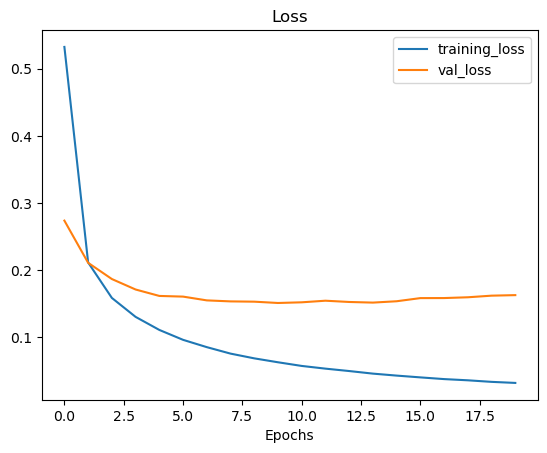

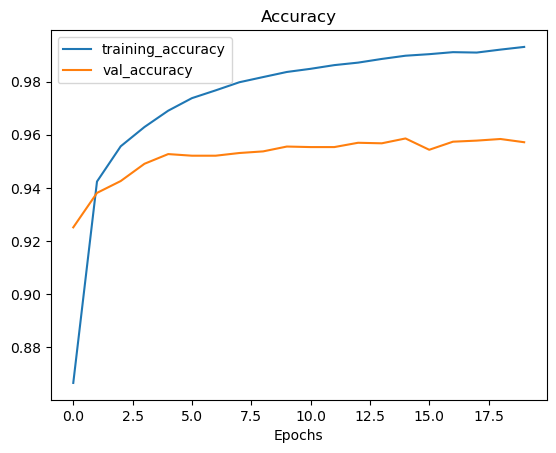

In [66]:
plot_loss_curves(history)


## **17-Fine-Tuning Model Using EfficientNetB0**

In [19]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

In [20]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate lower by 10x
              metrics=METRICS)

In [21]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
global_avg_pooling_layer True
output_layer True


In [22]:
# # Check which layers in our model is trainable
# for layer_number, layer in enumerate(model.layers[2].layers):
#   print(layer_number, layer.name, layer.trainable )

AttributeError: 'GlobalAveragePooling2D' object has no attribute 'layers'

In [23]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 25 # model has already done the 20 epochs (feature extraction), this is the total number of epochs we're after (20 + 5 =25)

# Fine-tune our model
history_fine_tune = model.fit(train_data,
                              epochs=fine_tune_epochs,
                              validation_data=val_data,
                              validation_steps=len(val_data),
                              initial_epoch=history.epoch[-1])

Epoch 20/25
1237/1237 [==============================] - 1162s 932ms/step - loss: 0.0461 - tp: 43603.0000 - fp: 655.0000 - tn: 1602749.0000 - fn: 936.0000 - accuracy: 0.9817 - precision: 0.9852 - recall: 0.9790 - auc: 0.9996 - val_loss: 0.1765 - val_tp: 4689.0000 - val_fp: 191.0000 - val_tn: 177217.0000 - val_fn: 239.0000 - val_accuracy: 0.9552 - val_precision: 0.9609 - val_recall: 0.9515 - val_auc: 0.9957
Epoch 21/25
1237/1237 [==============================] - 1145s 925ms/step - loss: 0.0281 - tp: 39164.0000 - fp: 246.0000 - tn: 1423806.0000 - fn: 393.0000 - accuracy: 0.9920 - precision: 0.9938 - recall: 0.9901 - auc: 0.9999 - val_loss: 0.1976 - val_tp: 4678.0000 - val_fp: 213.0000 - val_tn: 177195.0000 - val_fn: 250.0000 - val_accuracy: 0.9515 - val_precision: 0.9565 - val_recall: 0.9493 - val_auc: 0.9950
Epoch 22/25
1237/1237 [==============================] - 1150s 929ms/step - loss: 0.0216 - tp: 39261.0000 - fp: 178.0000 - tn: 1423874.0000 - fn: 296.0000 - accuracy: 0.9939 - prec

## **18- Evaluate Fine-Tune Model**

In [24]:
# Evaluate on the whole test dataset
fine_tune_results =model.evaluate(test_data)
fine_tune_results

156/156 [==============================] - 133s 849ms/step - loss: 0.1742 - tp: 4761.0000 - fp: 188.0000 - tn: 179164.0000 - fn: 221.0000 - accuracy: 0.9585 - precision: 0.9620 - recall: 0.9556 - auc: 0.9952


[0.17420367896556854,
 4761.0,
 188.0,
 179164.0,
 221.0,
 0.958450436592102,
 0.962012529373169,
 0.9556403160095215,
 0.9951837062835693]

## **19-Compare The Histories**

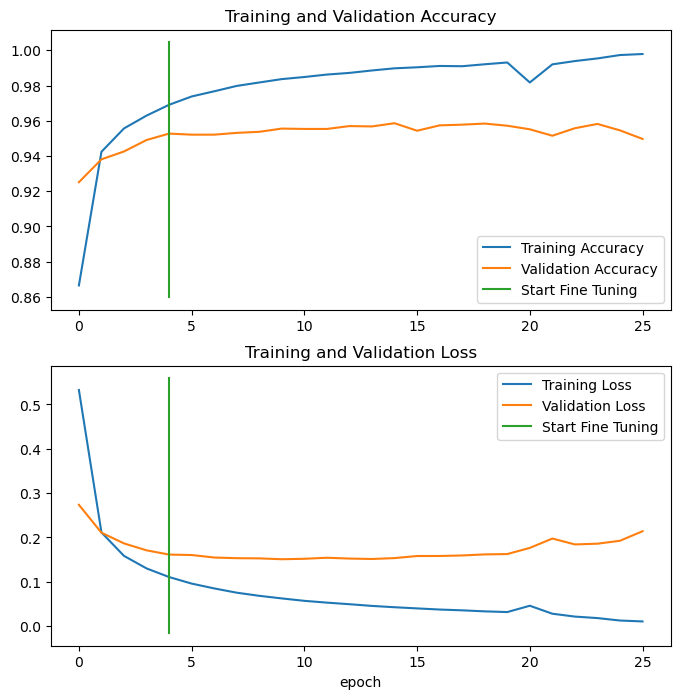

In [67]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history,
                 new_history=history_fine_tune,
                 initial_epochs=5)

## **20-Saving and Loading The Model**

In [26]:
model.save('models/plant_disease_detector.h5')

c:\Users\m7abu\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Make Prediction with Trained Model**

In [27]:
# Make predictions with model
preds_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it left

156/156 [==============================] - 127s 799ms/step


In [28]:
# What's the shape of our predictions?
preds_probs.shape

(4982, 37)

In [29]:
# Let's see whats the first 10 predictions looks like
preds_probs[:10]

array([[9.99552071e-01, 4.72832170e-07, 3.35702785e-11, 4.47431405e-04,
        7.20457935e-18, 5.04903041e-15, 8.30096693e-14, 6.00493683e-11,
        1.65216807e-16, 3.38681261e-22, 1.31637295e-18, 7.04283546e-20,
        2.65063552e-13, 1.16559984e-09, 5.87752791e-10, 9.73271485e-13,
        1.07892667e-10, 7.02466378e-14, 3.61979488e-15, 5.37909001e-17,
        7.58318443e-14, 4.59399734e-18, 4.59695171e-10, 1.89613553e-16,
        3.10570146e-12, 9.09741726e-12, 4.14380075e-12, 1.89815402e-17,
        8.35983843e-13, 1.16929055e-15, 6.78828738e-13, 1.72495772e-15,
        6.37387433e-19, 1.02818121e-09, 4.09288016e-18, 1.77260886e-12,
        7.92623446e-21],
       [9.99988317e-01, 5.77518285e-12, 4.93035578e-11, 3.29817978e-11,
        2.34946335e-15, 9.05543019e-16, 2.92090939e-12, 3.95179806e-10,
        6.60458559e-14, 3.84347362e-18, 3.50301423e-15, 1.08076582e-17,
        2.90938961e-15, 2.64604051e-15, 4.71751327e-13, 3.60194832e-15,
        1.17360487e-05, 4.84326595e-14,

In [30]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([9.9955207e-01, 4.7283217e-07, 3.3570279e-11, 4.4743140e-04,
        7.2045794e-18, 5.0490304e-15, 8.3009669e-14, 6.0049368e-11,
        1.6521681e-16, 3.3868126e-22, 1.3163730e-18, 7.0428355e-20,
        2.6506355e-13, 1.1655998e-09, 5.8775279e-10, 9.7327149e-13,
        1.0789267e-10, 7.0246638e-14, 3.6197949e-15, 5.3790900e-17,
        7.5831844e-14, 4.5939973e-18, 4.5969517e-10, 1.8961355e-16,
        3.1057015e-12, 9.0974173e-12, 4.1438008e-12, 1.8981540e-17,
        8.3598384e-13, 1.1692905e-15, 6.7882874e-13, 1.7249577e-15,
        6.3738743e-19, 1.0281812e-09, 4.0928802e-18, 1.7726089e-12,
        7.9262345e-21], dtype=float32),
 37,
 0.999999978795147)

In [31]:
# We get one prediction probability per class(in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilites for sample 0: {len(preds_probs[0])}")
print(f"What prediction probabilites sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")


Number of prediction probabilites for sample 0: 37
What prediction probabilites sample 0 looks like:
 [9.9955207e-01 4.7283217e-07 3.3570279e-11 4.4743140e-04 7.2045794e-18
 5.0490304e-15 8.3009669e-14 6.0049368e-11 1.6521681e-16 3.3868126e-22
 1.3163730e-18 7.0428355e-20 2.6506355e-13 1.1655998e-09 5.8775279e-10
 9.7327149e-13 1.0789267e-10 7.0246638e-14 3.6197949e-15 5.3790900e-17
 7.5831844e-14 4.5939973e-18 4.5969517e-10 1.8961355e-16 3.1057015e-12
 9.0974173e-12 4.1438008e-12 1.8981540e-17 8.3598384e-13 1.1692905e-15
 6.7882874e-13 1.7249577e-15 6.3738743e-19 1.0281812e-09 4.0928802e-18
 1.7726089e-12 7.9262345e-21]
The class with highest predicted probability by the model for sample 0: 0


In [32]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
# How many pred classes we have?
len(pred_classes)

4982

In [34]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
# How many y_labels are there?
len(y_labels)

4982

In [36]:
# The results from the saved model (Above) should be very similar to the results below
fine_tune_results

[0.17420367896556854,
 4761.0,
 188.0,
 179164.0,
 221.0,
 0.958450436592102,
 0.962012529373169,
 0.9556403160095215,
 0.9951837062835693]

In [37]:
import json
# Get a list of class names
class_names =test_data.class_names
class_names[:10]


# Save class_name_lookup as a JSON file
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

In [38]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

input_image_path = "../../output_1/test/Tomato__septoria_leaf_spot/0745df82-cfd3-498c-add3-1a4d20f281b2___JR_Sept.L.S 8430.JPG"  

# Load and preprocess the input image
input_image = load_img(input_image_path, target_size=(224, 224))
input_image = img_to_array(input_image)
input_image = preprocess_input(input_image)
input_image = np.expand_dims(input_image, axis=0)  

predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index] 

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 2s 2s/step
Predicted class: Tomato__septoria_leaf_spot


In [40]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      savefig=True)

## **23- Classification Report**

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.99      0.99      0.99       166
           2       0.86      0.97      0.91        37
           3       0.99      0.99      0.99        70
           4       0.55      0.54      0.55        50
           5       0.59      0.47      0.52        57
           6       0.57      0.79      0.66        48
           7       0.58      0.67      0.62        69
           8       0.85      0.51      0.64        45
           9       0.99      0.98      0.98       132
          10       0.98      0.99      0.99       110
          11       1.00      1.00      1.00       117
          12       1.00      0.96      0.98       139
          13       1.00      1.00      1.00      1139
          14       1.00      1.00      1.00        47
          15       0.99      1.00      0.99        90
          16       1.00      1.00      1.00       231
          17       0.97    

In [42]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 63.0},
 '1': {'precision': 0.9939759036144579,
  'recall': 0.9939759036144579,
  'f1-score': 0.9939759036144579,
  'support': 166.0},
 '2': {'precision': 0.8571428571428571,
  'recall': 0.972972972972973,
  'f1-score': 0.9113924050632912,
  'support': 37.0},
 '3': {'precision': 0.9857142857142858,
  'recall': 0.9857142857142858,
  'f1-score': 0.9857142857142858,
  'support': 70.0},
 '4': {'precision': 0.5510204081632653,
  'recall': 0.54,
  'f1-score': 0.5454545454545455,
  'support': 50.0},
 '5': {'precision': 0.5869565217391305,
  'recall': 0.47368421052631576,
  'f1-score': 0.5242718446601942,
  'support': 57.0},
 '6': {'precision': 0.5671641791044776,
  'recall': 0.7916666666666666,
  'f1-score': 0.6608695652173913,
  'support': 48.0},
 '7': {'precision': 0.5822784810126582,
  'recall': 0.6666666666666666,
  'f1-score': 0.6216216216216217,
  'support': 69.0},
 '8': {'precision': 0.8518518518518519,
  'recall': 0.51

In [43]:
class_names

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pomegranate__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Strawberry___leaf_scorch',
 'Strawberry__healthy',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus']

In [44]:
classification_report_dict["7"]["f1-score"]

0.6216216216216217

In [45]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'Apple__black_rot': 1.0,
 'Apple__healthy': 0.9939759036144579,
 'Apple__rust': 0.9113924050632912,
 'Apple__scab': 0.9857142857142858,
 'Cassava__bacterial_blight': 0.5454545454545455,
 'Cassava__brown_streak_disease': 0.5242718446601942,
 'Cassava__green_mottle': 0.6608695652173913,
 'Cassava__healthy': 0.6216216216216217,
 'Cassava__mosaic_disease': 0.6388888888888888,
 'Corn__common_rust': 0.9847328244274809,
 'Corn__gray_leaf_spot': 0.9864253393665158,
 'Corn__healthy': 1.0,
 'Grape__black_measles': 0.9816849816849816,
 'Grape__black_rot': 0.9969284774023695,
 'Grape__healthy': 1.0,
 'Grape__leaf_blight_(isariopsis_leaf_spot)': 0.994475138121547,
 'Peach__bacterial_spot': 0.9956709956709957,
 'Peach__healthy': 0.9866666666666666,
 'Pepper_bell__bacterial_spot': 0.9674418604651163,
 'Pepper_bell__healthy': 0.9706840390879479,
 'Pomegranate__diseased': 0.9824561403508771,
 'Pomegranate__healthy': 1.0,
 'Potato__early_blight': 0.9298245614035088,
 'Potato__healthy': 0.9375,
 'Potato

In [46]:
# Turn f1 scores into Dataframe visualization
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                        

,class_names,f1-score
0,Apple__black_rot,1.000000
11,Corn__healthy,1.000000
26,Strawberry__healthy,1.000000
21,Pomegranate__healthy,1.000000
14,Grape__healthy,1.000000
13,Grape__black_rot,0.996928
16,Peach__bacterial_spot,0.995671
36,Tomato__yellow_leaf_curl_virus,0.995334
15,Grape__leaf_blight_(isariopsis_leaf_spot),0.994475
1,Apple__healthy,0.993976


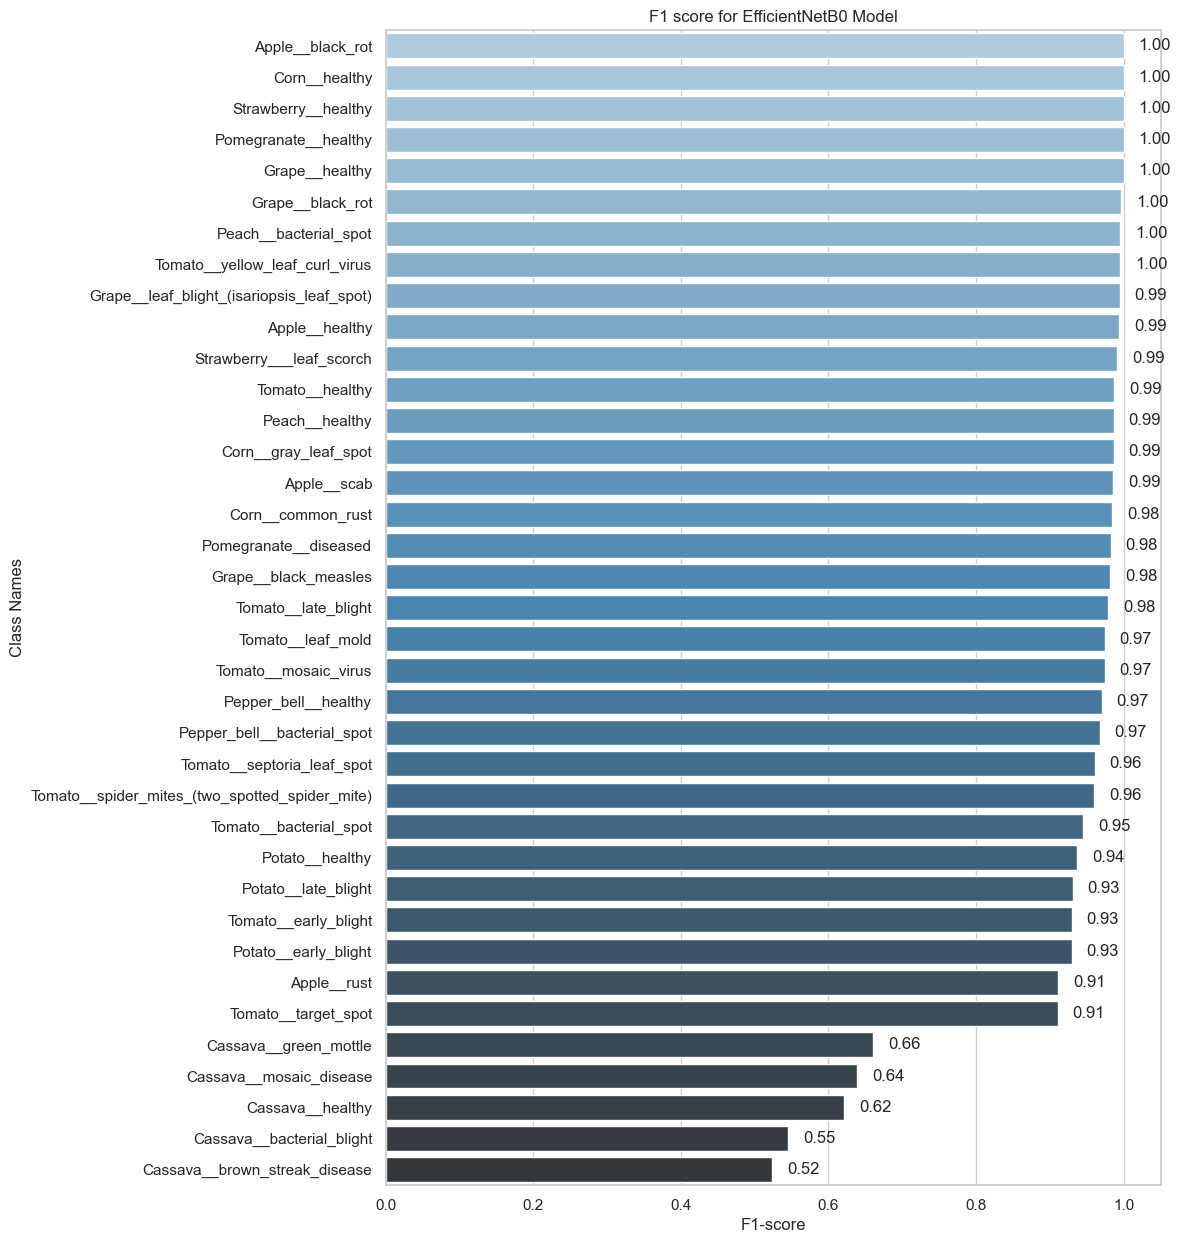

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 15))

# Plot the horizontal bar chart
ax = sns.barplot(x="f1-score", y="class_names", data=f1_scores, palette="Blues_d")

# Add value labels to the end of each bar
for p in ax.patches:
    ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2,
            '{:.2f}'.format(p.get_width()), ha='left', va='center')

# Set labels and title
plt.xlabel("F1-score")
plt.ylabel("Class Names")
ax.set_title("F1 score for EfficientNetB0 Model")



# Show the plot
plt.show()


In [48]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\m7abu\AppData\Local\Temp\tmprx25y9ih\assets


INFO:tensorflow:Assets written to: C:\Users\m7abu\AppData\Local\Temp\tmprx25y9ih\assets
